# Homework 1

J Steven Raquel
PSTAT 134
Fri 9AM Section

## Testing for distributions

For this assignment, I will simulate data from two different distributions and use hypothesis testing to determine whether the data actually conforms to the distribution they were sampled from. 

In [156]:
# importing the necessary modules
import numpy as np
import pandas as pd
import random
from scipy import stats
from math import sqrt

In [157]:
# a function that counts the times a coin comes up heads (1)
def coin_flip(size):
    heads = 0
    for x in range(size):
        flip = random.randint(0,1) # picking randomly between 0 and 1
        if flip == 1: 
            heads += 1
    return heads

A coin flip follows the Bernoulli distribution, which is itself a special case of the Binomial distribution. 

The following code simulates flipping coins a different number of times, recording how many times it comes up heads, and what percentage of the flips in each session were heads. 

In [158]:
# different sample sizes
n_choices = np.array([5, 10, 15, 20, 25, 50, 100])
# simulating different numbers of coin flips and storing it in an array
sims = []
for n in n_choices:
    sims += [coin_flip(n)]

In [159]:
# creating a data.frame of the number of throws and the percentage of heads
df = pd.DataFrame({
    'n_flips': n_choices,
    'n_heads': sims,
    'pct_heads' : sims / n_choices
})
df

,n_flips,n_heads,pct_heads
0,5,3,0.600000
1,10,5,0.500000
2,15,10,0.666667
3,20,10,0.500000
4,25,9,0.360000
5,50,32,0.640000
6,100,55,0.550000


As we can see in the table and the following graph, it's quite clear that as you increase the sample size, the sample mean will gradually approach the theoretical mean. Since we know that our coin in this case is fair, it should come as no surprise that although initial flips were far from the theoretical mean (0.5) the increase in sample size decreased the variance more and more. 

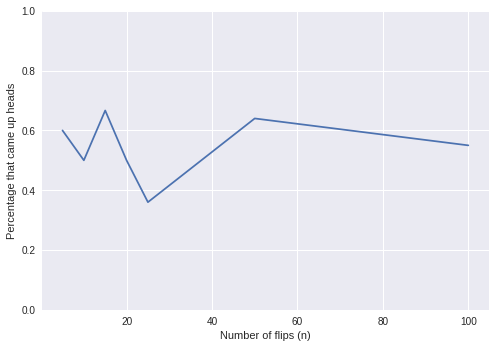

In [160]:
# for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize

# plotting number of flips vs percentage that came up heads
axes = plt.gca()
axes.set_ylim([0,1])
figsize(11, 9)
plt.plot(df['n_flips'], df['pct_heads']);
plt.xlabel("Number of flips (n)");
plt.ylabel("Percentage that came up heads");

## Hypothesis Testing

Let $p$ equal the probability that a certain coin comes up heads. 

Suppose we have the null and alternative hypotheses 

$H_0: \text{The coin is fair } (p = 0.5)$

$H_1: \text{The coin is not fair } (p \neq 0.5)$

Suppose we have flipped a coin 100 times and 57% of the time is has come up heads, as you can see in the simulation above. 

We can use a two-sided Z-test to test whether or not the coin is truly fair. 

This consists of calculating a test statistic $z$, which 'standardizes' our sample mean to the standard Normal distribution. This employs the Normal approximation to the Binomial distribution. This is possible for large sample size $n$, via the Central Limit Theorem which states that as the sample size approaches infinity, the distribution will approach Normality. This parameter is more specifically considered fulfilled if $np \geq 10$ and $nq \geq 10$, which is fulfilled in our case.

The Z-statistic quantifies how far away our sample mean $\hat{p}$ is from the true population mean $p$ (0.5). We then compare the statistic to a critical value determined by the confidence level $\alpha$. If the absolute value of our test-statistic (because it's a two-sided test) exceeds this critical value, then we reject the null hypothesis $H_0$.

For the Binomial distribution, the Z-statistic is calculated thusly

$$z = \frac{\bar{x} - x - p}{\sqrt{npq}}$$

where $q = 1-p$ and $n$ is the sample size, 100.

At a confidence level of $\alpha = 0.05$, we would _reject_ the null hypothesis $H_0$ if $|z| > 1.96$.

Our $\hat{p} = 0.57$, $p = 0.5$, and $q = 0.5$. Therefore our Z-statistic is

In [161]:
(57-50-0.5)/sqrt(100*0.5*0.5)

1.3

Since 1.3 < 1.96, we have insufficient evidence to reject the null hypothesis at the 0.05 confidence level, and conclude that the coin is fair. We know this to be true given that we sampled from a distribution in which both heads and tails had an equal probablity of occurring.

## Confidence Level

When we set the confidence level $\alpha$, we are essentially designating a threshold. For a two-sided Z-test at a confidence level of 0.05, we are saying that if our sample mean is more than 1.96 standard deviations away from the theoretical mean, it is more than 5% probable to be a Type I error. This probability is known as the **p-value**. The confidence level can be said to represent the maximum probability of Type I error that we are comfortable with accepting, or the *empirical probability of a Type I error*.

### Type I and Type II errors

The confidence level $\alpha$ is also the probability of incurring a **Type I error**, which is to reject a true null hypothesis, otherwise known as a _false positive_. Conversely, a **Type II error** is to fail to reject a false null hypothesis, or a _false negative_. The probability of a Type II error is represented by $\beta$. The probability of _not_ incurring a Type 2 error in a hypothesis test is called the 'power' of a test. 

In our example, a Type I error is analogous to conclude that a fair coin is unfair, and a Type II error would be to conclude that an unfair coin is fair. 

The confidence level is the theoretical probability of the Type I error--we reject the null hypothesis if this probability is exceeded.

The **power** of a hypothesis test is determined by a number of factors, namely the confidence level and the sample size. The larger the sample size, the greater the power of the test. We can also set a higher confidence level $\alpha$--thereby increasing our chances at a Type I error. So there is a sort of trade-off between Type I and Type II error inherent in hypothesis testing. The power can also be increased by doing a one-sided test. In our example, a two-sided test tests the alternative hypothesis that the coin is simply not fair ($H_1: p \neq 0.5$), i.e. it is either more likely to be heads or tails. A one-sided test would test against the alternative that the coin is only more likely to be heads ($H_1: p > 0.5$), or more likely to be tails ($H_1: p < 0.5$), where $p$ is the probability of landing heads.

We can illustrate the effects of adjusting the confidence level and the sample size, as well as test different alternative hypotheses, to witness the effect on the power of the test.

### Adjusting confidence level

Suppose we sample from a distribution in which we know that the coin is unfair ($p \neq 0.5$), and test it against the null hypothesis that it *is* fair. We can compare our results at different confidence levels and see how the conclusions differ, if at all. 

In [162]:
# simulating a weighted coin with true p = 0.6
def coin2_flip(size):
    heads = 0
    for x in range(size):
        flip = random.random()
        if flip <= 0.6:
            heads += 1
    return heads

In [163]:
n_choices = np.array([5, 10, 15, 20, 25, 50, 100])

# simulating different numbers of coin flips and storing it in an array
sims2 = []
for n in n_choices:
    sims2 += [coin2_flip(n)]

In [164]:
# creating a data.frame of the number of throws and the percentage of heads
df2 = pd.DataFrame({
    'n_flips': n_choices,
    'n_heads': sims2,
    'pct_heads' : sims2 / n_choices
})
df2

,n_flips,n_heads,pct_heads
0,5,2,0.400000
1,10,4,0.400000
2,15,8,0.533333
3,20,12,0.600000
4,25,10,0.400000
5,50,30,0.600000
6,100,69,0.690000


In [165]:
# calculating Z-statistic
(61-50-0.5)/sqrt(100*0.5*0.5)

2.1

Our Z-statistic for this two-sided test is 2.1. Note that at the 0.05 confidence level, we would make the correct decision reject the null hypothesis, but at the 0.01 confidence level, we would fail to do so. This is because 2.1 exceeds the critical value of 1.96 for $\alpha=0.05$, but does not exceed the critical value 2.57 for $\alpha=0.01$.

In simplest terms, the lowered confidence level increased the probability of a Type II error, which is exactly what happened when we concluded that the coin was fair, when it is in fact not. This can also be described as having decreased the power of the test.

Lowering the confidence level lowered our willingness to incur a false positive (Type I error), but it backfired when we ended up with a false negative instead.

### Theoretical and Empirical Type I and Type II error

To reiterate, when we set a confidence level for a hypothesis test, we are establishing a theoretical probability of Type I error. When our empirical probability of Type I error (p-value) does not exceed this threshold, we reject the null hypothesis. If it exceeds it, we reject the null, because the probability of incurring the error outweighs our 'confidence' that we will not. 

P-values can be computed by using the binomial cumulative distribution function (CDF). For a two-sided test, the p-value is calculated by the equation

$ 2 * P(X \geq x)$

where x is the number of successes, and X is a random variable from the population.

In [166]:
# p-value for two-sided test with x = 64, n = 100, p = 0.5
# sampled from 100 flips of an unfair coin
stats.binom_test(61,100,0.5,alternative = 'two-sided')

0.035200200217704813

This p-value of 0.0352 is greater than 0.01, but lower than 0.05, which is of course consistent with our earlier conclusions at the two different confidence levels to fail to reject and to reject the null hypothesis, respectively. 

### Calculating Power

It would be of interest to see how our empirical Type II error changed with the adjustment in confidence level, since that is how the error occurred in the first place.

We know that the Z-statistic must be at least 1.96 to reject at the 0.05 level, and at least 2.57 at the 0.01 level. We would like to find the values at which point this thresholds are met. 

In [167]:
# reject at both 0.05 and 0.01
(64-50-0.5)/sqrt(100*0.5*0.5)

2.7

In [168]:
# reject at 0.05 but not at 0.01
(61-50-0.5)/sqrt(100*0.5*0.5)

2.1

Looking at the Z-score table to determine the probability of exceeding these values, we get 1 - 0.9965 and 1- .9821, respectively, or 

In [169]:
# power of 0.01 test
1-0.9965

0.0034999999999999476

In [170]:
# power of 0.05 test
1-0.9821

0.017900000000000027

Thusly we see how the power increases when you increase confidence level, as we illustrated when we incurred a Type II error at the lower confidence level, but not at the higher one.